In [1]:
import numpy as np
import pandas as pd
import math 
import regex as re
from datetime import datetime
import timedelta as td
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def dirImagens(pDirImagem):
    try:
        if (not os.path.isdir(pDirImagem)):
            os.mkdir(pDirImagem)
    except OSError as e:
        print(e.args[1])
    
def abriPlanilha():
    diretorio='./data/'
    for arquivo in os.listdir(diretorio):
        if ((re.findall('INSCRITOS', arquivo)) and
               (re.findall('csv', arquivo))):
            return (diretorio+arquivo)
    
dirImagens('Imagens')
    
ins = pd.read_csv(abriPlanilha()
                 ,header=1
                 ,sep=','
                 ,low_memory=True
                 )

In [3]:
ins.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Situação,Nº de Inscrição,Nome Completo,CPF,Data de Nasc.,Gênero,Escolaridade,...,Telefone,E-mail,CEP,Bairro,Cidade,Deseja incluir outro participante?,Deseja incluir outro participante?.1,Observações,Selecionado,Perfis
0,NaN,NaN,NaN,Em análise,1,Isabelle Victoria Pereira De Souza,51454217880,12/09/2003,Feminino,Ensino Superior,...,11954852961,isabellevictoria.urs@gmail.com,08121-620,Jd Nélia,São Paulo,N,Desenvolvedor,Tamanho de Camiseta: M,SIM,NaN
1,NaN,NaN,NaN,Em análise,2,Guilherme Antunes de Campos,50069148821,03/06/2004,Masculino,Ensino Superior Cursando,...,11959762456,guiancam@gmail.com,7091000,Vila Progresso,Guarulhos,N,Desenvolvedor,Tamanho de Camiseta: G,NaN,NaN
2,NaN,NaN,NaN,Em análise,3,Wezilyana Melice Farias de Lima,1264343442,13/08/1983,Feminino,Pós-graduação completo,...,11992471992,lilyfarias@gmail.com,1529001,Aclimação,São Paulo,N,Analista de Negócios,Tamanho de Camiseta: M,NaN,NaN
3,NaN,NaN,NaN,Em análise,4,Jéssica Bueno Ramos,51713271818,11/01/2005,Feminino,Ensino Superior Cursando,...,11963095666,jessicabuenoramos5@gmail.com,7141420,Jardim Santa Emília,Guarulhos,N,Universitário,Tamanho de Camiseta: M,NaN,NaN
4,NaN,NaN,NaN,Em análise,5,Gabriel Vinícius Rocha Barboza,46993988801,17/01/2005,Masculino,Cursando Ensino Superior em Análise e desenvol...,...,(11) 94585-0708,gabrielrochabarboza@gmail.com,07135-720,Vila Sítio dos Morros,Guarulhos,N,Desenvolvedor,Tamanho de Camiseta: G,NaN,NaN


In [4]:
colunas=['col1','col2','col3','situacao','nroInscricao','nome',
        'cpf','dataNascimento','genero','escolaridade',
        'instituicao','telefone','email','cep','bairro',
        'cidade','incluiOutro','perfil','observacao','selecionado','perfis']

ins.columns=colunas

In [5]:
def columnsDrop():
    ins.drop('situacao', axis=1, inplace=True)
    ins.dropna(axis=1, how='all', inplace=True)
    ins.dropna(axis=0, how='all', inplace=True)

columnsDrop()

In [6]:
def columnsInsert():
    ins.insert(3, 'cpfAjustado', '')
    ins.insert(4, 'cpfValidado', '')
    ins.insert(5, 'cpfUF', '')
    ins.insert(7, 'idade', 0)
    ins.insert(8, 'dataNascAjustada', ' ')
    ins.insert(10, 'generoId', 99)
    ins.insert(12, 'escolaridadeId', 0)
    ins.insert(13, 'escolaridade2', ' ')
    ins.insert(15, 'instituicaoId', 0)
    ins.insert(16, 'instituicaoAjustada', '')
    ins.insert(18, 'telefoneAjustado', '')
    ins.insert(20, 'emailValidado', '')
    ins.insert(22, 'cepAjustado', '')
    ins.insert(25, 'cidadeId', 0)
    ins.insert(29, 'tamanhoCamisetaId', 0)
    ins.insert(31, 'selecionado2', '')

columnsInsert()

In [7]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nroInscricao         136 non-null    object
 1   nome                 136 non-null    object
 2   cpf                  57 non-null     object
 3   cpfAjustado          136 non-null    object
 4   cpfValidado          136 non-null    object
 5   cpfUF                136 non-null    object
 6   dataNascimento       136 non-null    object
 7   idade                136 non-null    int64 
 8   dataNascAjustada     136 non-null    object
 9   genero               136 non-null    object
 10  generoId             136 non-null    int64 
 11  escolaridade         136 non-null    object
 12  escolaridadeId       136 non-null    int64 
 13  escolaridade2        136 non-null    object
 14  instituicao          120 non-null    object
 15  instituicaoId        136 non-null    int64 
 16  institui

### Eliminar linhas onde o "nome" é "NaN" ou "Nulo".

In [8]:
def eliminarLinhasNomeNulo(dataFrame, campo):
    linhas=dataFrame[pd.isnull(dataFrame[campo])].index
    if (not len(linhas)==0):
        print(linhas)
        dataFrame.drop(axis=0, labels=linhas, inplace=True)
    
    return dataFrame
    
ins=eliminarLinhasNomeNulo(ins, 'nome')

### Biblioteca de funções.

In [9]:
def cpfAjustado(cpf) -> str:
    if (pd.isnull(cpf)):
        return "Não informado!"
    
    pattern='([0-9]{3})([.])([0-9]{3})([.])([0-9]{3})([-])([0-9]{2})'
    if (re.search(pattern, cpf)):
        return cpf
    
    cpf=re.sub('[\.\-]','',cpf); cpf=cpf.zfill(11)
        
    pattern='([0-9]{3})([0-9]{3})([0-9]{3})([0-9]{2})'
    cpf=re.search(pattern, cpf)
    cpf='{}.{}.{}-{}'.format(cpf.group(1)
                            ,cpf.group(2)
                            ,cpf.group(3)
                            ,cpf.group(4)
                            )
    return cpf

def dataNascAjustada(pDataNascimento : str, éIdade : bool = False):
    if (pd.isnull(pDataNascimento)):
        if (éIdade):
            return 0
        else:
            return "Não informada!"
    
    dtNasc=pDataNascimento; dtRef=''
    #   
    pattern='([0-9]{1,2})([/])([0-9]{1,2})([/])([0-9]{2,4})'
        
    if (not re.search(pattern, dtNasc)):
        if (len(dtNasc)==6 or len(dtNasc)==8):
            pattern='([0-9]{2})([0-9]{2})([0-9]{2,4})'
            dtNasc=re.search(pattern, dtNasc)
            if (dtNasc):
                dtNasc='{}/{}/{}'.format(dtNasc.group(1),
                                        dtNasc.group(2),
                                        dtNasc.group(3)
                                        )
            else:
                return 0
            
        else:
            return 0
        
    dtNasc=datetime.strptime(dtNasc, '%d/%m/%Y')
                
    if (éIdade):
        diferencaData=(datetime.today()-dtNasc)
        dias=diferencaData.days
        anos, dias = divmod(dias, 365)
        # Ano negativo!
        if (anos<0):
            anos=0
        dtRef=anos
    else:
        dtRef=dtNasc.strftime('%d/%m/%Y %H:%M:%S')
    
    return dtRef

def quantGenero(genero) -> int:
    if (pd.isnull(genero)):
        return 0
    else:
        genero=genero.upper(); genero=str.strip(genero)
    if (genero=='FEMININO'):
        return 1
    elif (genero=='MASCULINO'):
        return 2
    elif (re.search('N[AÃ]O BIN[AÁ]RIO', genero)):
        return 3
    elif (re.search('PREFIRO N[AÃ]O INFORMAR', genero)):
        return 4
    else:
        return 99
    
def quantEscolaridade(escolaridade) -> int:
    escolaridade=escolaridade.upper(); escolaridade=str.strip(escolaridade)
    valor=0
    if (
        re.findall('M[EÉ]DIO', escolaridade) or
        (re.findall('EM', escolaridade) and 
             not (re.findall('SUPERIOR', escolaridade) or
                  re.findall('GRADUA[CÇ][ÃA]O',escolaridade))
        )
       ):
        valor=10
    elif (
         re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade) or
         re.findall('BACHAREL', escolaridade) or
         re.findall('GRADUA[CÇ][AÃ]O', escolaridade) or
         re.findall('GRADUAD[AO]', escolaridade)
         ):
        valor=20
    elif re.findall('P[ÓO]S', escolaridade):
        valor=30
    elif re.findall('MESTRADO', escolaridade):
        valor=40
    elif re.findall('DOUTORADO', escolaridade):
        valor=50
    else:
        return valor
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade) or
        re.findall('ANDAMENTO', escolaridade))):
        valor+=5
        
    return valor

def qualEscolaridade(escolaridade) -> str:
    escolaridade=escolaridade.upper(); escolaridade=str.strip(escolaridade)
    texto='N/D'
    if (
        re.findall('M[EÉ]DIO', escolaridade) or
        (re.findall('EM', escolaridade) and 
             not (re.findall('SUPERIOR', escolaridade) or
                  re.findall('GRADUA[CÇ][ÃA]O',escolaridade))
        )
       ):
        texto='ENS.MÉDIO'
    elif (
         re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade) or
         re.findall('BACHAREL', escolaridade) or
         re.findall('GRADUA[CÇ][AÃ]O', escolaridade) or
         re.findall('GRADUAD[AO]', escolaridade)
         ):
        texto='ENS.SUPERIOR'
    elif re.findall('P[ÓO]S', escolaridade):
        texto='PÓS-GRADUAÇÃO'
    elif re.findall('MESTRADO', escolaridade):
        texto='MESTRADO'
    elif re.findall('DOUTORADO', escolaridade):
        texto='DOUTORADO'
    else:
        return texto
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade) or
        re.findall('ANDAMENTO', escolaridade))):
        texto=texto+' COMPLETO'
    else:
        texto=texto+' INCOMPLETO/CURSANDO'
        
    return texto

def telefoneAjustado(fone) -> str:
    #print('Telefone: {}'.format(fone))
    if (pd.isnull(fone)):
        #print('Não informado!'); print('----------------')
        return 'Não informado!'
    else:
        fone=str.strip(fone)
    
    pattern='([\(])([0-9]{2})([\)])([\ ])([0-9]{5})([-])([0-9]{4})'
    if (re.search(pattern, fone)):
        #print('foneCond.1: '+fone); print('----------------')
        return fone

    for char in ([' ','-','\(','\)']):
        fone=re.sub(char,'',fone)
    
    pattern='([0-9]{2})([0-9]{5})([0-9]{4})'
    if (re.search(pattern, fone) and (not re.search('^55', fone))): 
        fone=re.search(pattern, fone)
        fone='({}) {}-{}'.format(fone.group(1)
                                 ,fone.group(2)
                                 ,fone.group(3)
                                )
        #print('foneCond.2: '+fone); print('----------------')
    elif (re.search('^55',fone)):
        pattern = '([0-9]{2})([0-9]{2})([0-9]{5})([0-9]{4})'
        fone=re.search(pattern, fone)
        fone='({}) {}-{}'.format(
                                fone.group(2)
                                ,fone.group(3)
                                ,fone.group(4)
                                )
        #print('foneCond.3: '+fone); print('----------------')
    else:
        #print('Inválido'); print('----------------')
        fone='Inválido'

    return fone

def validarEmail(email):
    # https://www.geeksforgeeks.org/check-if-email-address-valid-or-not-in-python/
    email=str.strip(email)
    pattern='(^[a-zA-Z0-9_.-]{4,40})(@){1}([a-zA-Z0-9-]+)(\.){1}([a-zA-Z0-9-.]+$)'
    #print(pattern, email)
    email=re.search(pattern, email)
    #print(email)
    if (not email):
        return [False, 'Formação do E-Mail incorreta!']
    #print(email.group(2), email.start(), email.end()) ## @
    return [True, str.lower(email.group(0))]


def instituicaoAjustada(pInst) -> list:
    if (pd.isnull(pInst)):
        return ['Não Informada!',0]
    else:
        pInst=pInst.upper(); pInst=str.strip(pInst)

    if (re.findall('ENIAC',pInst)):
        inst=['ENIAC',1]
    elif (re.findall('INSTITUTO FEDERAL',pInst) or 
          re.findall('IF',pInst)
         ):
        inst=['IFSP',2]
    elif (re.findall('USP',pInst) or 
         re.findall('UNIVERSIDADE DE S[AÃ]O PAULO',pInst)):
        inst=['USP',3]
    elif (re.findall('BELAS ARTES', pInst)):
        inst=['BELAS ARTES',4]
    elif (re.findall('FATEC', pInst) or re.findall('FACULDADE DE TECNOLOGIA DE GUARULHOS', pInst)):
        inst=['FATEC',5]
    elif (re.findall('WYDEN', pInst)):
        inst=['WYDEN',6]
    elif (re.findall('JUDAS', pInst)):
        inst=['UNIV.SÃO JUDAS',7]
    elif (re.findall('FIAP', pInst)):
        inst=['FIAP',8]
    elif (re.findall('UNICAMP', pInst) or
         re.findall('CAMPINAS', pInst)):
        inst=['UNICAMP',9]
    elif (re.findall('ETEC', pInst)):
        inst=['ETEC',10]
    elif (re.findall('LICEU', pInst)):
        inst=['LICEU',11]
    elif (re.findall('MOACYR CAMPOS', pInst)):
        inst=['MOACYR CAMPOS',12]
    elif (re.findall('UNINOVE', pInst)):
        inst=['UNINOVE',13]
    elif (re.findall('FAM', pInst)):
        inst=['FAM',14]
    elif (re.findall('DRUMMOND', pInst)):
        inst=['DRUMMOND',15]
    elif (re.findall('IMPACTA', pInst)):
        inst=['IMPACTA',16]
    elif (re.findall('TORRICELLI', pInst)):
        inst=['TORRICELLI',17]
    elif (re.findall('ITB', pInst)):
        inst=['ITB',18]
    elif (re.findall('UNESP', pInst)):
        inst=['UNESP',19]
    elif (re.findall('CRUZEIRO DO SUL', pInst)):
        inst=['CRUZEIRO DO SUL',20]
    elif (re.findall('ANHANGUERA', pInst)):
        inst=['ANHANGUERA',21]
    elif (re.findall('VIRTUAL', pInst)):
        inst=['UNIVESP',22]
    elif (re.findall('SAL[EÉ]M', pInst)):
        inst=['JOÃO C.SALÉM',23]
    elif (re.findall('BROTERO', pInst)):
        inst=['FREDERICO B.BROTERO',24]
    elif (re.findall('SENAC', pInst)):
        inst=['SENAC',25]
    elif (re.findall('UNISA', pInst)):
        inst=['UNISA',26]
    elif (re.findall('UNG', pInst) or re.findall('UNIVERSIDADE DE GUARULHOS', pInst)):
        inst=['UNG',27]
        
    else:
        inst=['Outros',99]
    
    return inst

def cepAjustado(cep) -> str:
    cep=str.strip(cep)
    pattern='([0-9]{5})([-]{1})([0-9]{3})'
    if (not re.search(pattern, cep)):
        cep=re.sub('-','', cep)
        cep=cep.zfill(8)
        pattern='([0-9]{5})([0-9]{3})'
        cep=re.search(pattern, cep)
        cep='{}-{}'.format(cep.group(1),cep.group(2))
    return cep

def cidadeMaiuscula(cidade) -> str:
    return str.upper(str.strip(cidade))

def quantCidade(cidade) -> int:
    cidade=cidade.upper(); cidade=str.strip(cidade)
    if re.findall('GUARULHOS', cidade):
        return 1
    elif re.findall('S[ÃA]O PAULO', cidade):
        return 2
    elif re.findall('RIBEIR[ÃA]O PRETO', cidade):
        return 3
    elif re.findall('SANTO ANDR[ÉE]', cidade):
        return 4
    elif re.findall('GUARUJ[ÁA]', cidade):
        return 5
    elif re.findall('IGARAT[ÁA]', cidade):
        return 6
    elif re.findall('CARAPICU[ÍI]BA', cidade):
        return 7
    elif re.findall('S[ÃA]O VICENTE', cidade):
        return 8
    elif re.findall('ITAPEVI', cidade):
        return 9
    elif re.findall('ARARAQUARA', cidade):
        return 10
    elif re.findall('ARUJ[AÁ]', cidade):
        return 11   
    elif re.findall('MAIRIPOR[AÃ]', cidade):
        return 12  
    else:
        return 99

def quantTamanhoCamiseta(pTamanho) -> int:
    t=re.split('\s',pTamanho)
    if (t[len(t)-1]=='P'):
        return 1
    elif (t[len(t)-1]=='M'):
        return 2
    elif (t[len(t)-1]=='G'):
        return 3
    elif (t[len(t)-1]=='GG'):
        return 4
    else:
        return 99    

def opcaoSimNao(opcao):
    if (pd.isnull(opcao)):
        opcao='NÃO'
    if (re.findall('S[IM]', opcao.upper())):
        opcao='SIM'
    else:
        opcao='NÃO'
    return opcao

### Atribuição de dados e ajustes (ETL).

In [10]:
ins['cpfAjustado']=ins['cpf'].apply(lambda cpf: cpfAjustado(cpf))
ins['idade']=ins['dataNascimento'].apply(lambda dtNasc: dataNascAjustada(dtNasc, True))
ins['dataNascAjustada']=ins['dataNascimento'].apply(lambda dtNasc: dataNascAjustada(dtNasc, False))
ins['generoId']=ins['genero'].apply(lambda genero: quantGenero(genero))
ins['escolaridadeId']=ins['escolaridade'].apply(lambda escolaridade: quantEscolaridade(escolaridade))
ins['escolaridade2']=ins['escolaridade'].apply(lambda escolaridade: qualEscolaridade(escolaridade))
ins['instituicaoId']=ins['instituicao'].apply(lambda instituicao: instituicaoAjustada(instituicao)[1])
ins['instituicaoAjustada']=ins['instituicao'].apply(lambda instituicao: instituicaoAjustada(instituicao)[0])
ins['telefoneAjustado']=ins['telefone'].apply(lambda fone: telefoneAjustado(fone))
ins['emailValidado']=ins['email'].apply(lambda email : validarEmail(email)[1])
ins['cepAjustado']=ins['cep'].apply(lambda cep : cepAjustado(cep))
ins['cidade']=ins['cidade'].apply(lambda cidade : cidadeMaiuscula(cidade))
ins['cidadeId']=ins['cidade'].apply(lambda cidade: quantCidade(cidade))
ins['tamanhoCamisetaId']=ins['observacao'].apply(lambda obs: quantTamanhoCamiseta(obs))
ins['selecionado2']=ins['selecionado'].apply(lambda selecionado : opcaoSimNao(selecionado))

### Classe de validação de documentos (CPF e CNPJ).

In [11]:
class validaDocs:
    def __init__(self):
        self.__uf=[
                    ['DF','GO','MS','MT','TO'],
                    ['AC','AM','AP','PA','RO','RR'],
                    ['CE','MA','PI'],
                    ['AL','PB','PE','RN'],
                    ['BA','SE'],
                    ['MG'],
                    ['ES','RJ'],
                    ['SP'],
                    ['PR','SC'],
                    ['RS']
                  ]
        self.uf = None
        self.__dg1 = 0
        self.__dg2 = 0
    
    def CPF(self, cpf) -> list:
        if (pd.isnull(cpf)):
            return ('CPF não informado!', False, None)
        else:
            cpf=re.sub('[\.\-]','',cpf); cpf=cpf.zfill(11)

        pattern='[0-9]{3}[0-9]{3}[0-9]{3}[0-9]{2}'
        #pattern='[0-9]{3}\.[0-9]{3}\.[0-9]{3}\-[0-9]{2}'
        if (not re.search(pattern, cpf)):
            return ('Formato inválido!', False, None)
        
        # Primeiro dígito...
        soma=0
        for p, value in enumerate(range(10,1,-1)):
            #print(cpf[p], p, value)
            soma+=(int(cpf[p])*value)
        
        self.__dg1=(11-(soma%11))
        if (self.__dg1>=10):
            self.__dg1=0
            
        # Segundo dígito...
        soma=0
        for p, value in enumerate(range(11,1,-1)):
            #print(cpf[p], p, value)
            soma+=(int(cpf[p])*value)
        
        self.__dg2=(11-(soma%11))
        if (self.__dg2>=10):
            self.__dg2=0
       
        ## Dígito 1 e 2...
        #print('Dígito 1: {}, dígito 2: {}'.format(self.__dg1, self.__dg2))
        if (
            (self.__dg1!=int(cpf[9])) or
            (self.__dg2!=int(cpf[10]))
           ):
            return ('Dígito(s) inválido(s)!', False, None)
        else:
            rCPF=cpf[0:3]+'.'+cpf[3:6]+'.'+cpf[6:9]+'-'+cpf[9:]
        
        ## Atribui a lista de UFs.
        self.uf = self.__uf[int(cpf[8])-1]
        
        return (rCPF, True, self.uf)
    
    def CNPJ(self, cnpj) -> list:
        if (pd.isnull(cnpj)):
            return ('CNPJ não informado!', False, None)
        else:
            cnpj=re.sub('[\.\-\/\\\]','',cnpj);  cnpj.zfill(14)
        
        pattern='[0-9]{2}[0-9]{3}[0-9]{3}[0-9]{4}[0-9]{2}'
        if (not re.search(pattern, cnpj) or (len(cnpj)!=14)):
            return ('Formato inválido!', False, None)
        
        # Primeiro dígito...
        soma=0
        for p, valor in enumerate(range(5,1,-1)):
            #print(p, valor, cnpj[p])
            soma+=(int(cnpj[p])*valor)
        
        for p, valor in enumerate(range(9,1,-1)):
            #print(p, valor, cnpj[p+4])
            soma+=(int(cnpj[p+4])*valor)

        resto=((soma%11))
        if (resto<=1):
            self.__dg1=0
        else:
            self.__dg1=(11-resto)
        
        # Segundo dígito...
        soma=0
        for p, valor in enumerate(range(6,1,-1)):
            #print(p, valor, cnpj[p])
            soma+=(int(cnpj[p])*valor)
        
        for p, valor in enumerate(range(9,1,-1)):
            #print(p, valor, cnpj[p+5])
            soma+=(int(cnpj[p+5])*valor)

        resto=((soma%11))
        if (resto<=1):
            self.__dg2=0
        else:
            self.__dg2=(11-resto)
        
        #print(self.__dg1, self.__dg2)
        if (
            (self.__dg1!=int(cnpj[12])) or
            (self.__dg2!=int(cnpj[13]))
            ):
            return ('Dígito(s) verificador(es) inválido(s)', False, None)
        else:
            rCNPJ=cnpj[0:2]+'.'+cnpj[2:5]+'.'+cnpj[5:8]+'/'+cnpj[8:12]+'-'+cnpj[12:]

        return (rCNPJ, True, None)


### Tabela (output).

In [12]:
validarCPF=validaDocs()
ins['cpfValidado']=ins['cpf'].apply(lambda cpf : validarCPF.CPF(cpf)[0])
ins['cpfUF']=ins['cpf'].apply(lambda cpf : validarCPF.CPF(cpf)[2])

In [13]:
#ins.head()
ins

,nroInscricao,nome,cpf,cpfAjustado,cpfValidado,cpfUF,dataNascimento,idade,dataNascAjustada,genero,...,cepAjustado,bairro,cidade,cidadeId,incluiOutro,perfil,observacao,tamanhoCamisetaId,selecionado,selecionado2
0,1,Isabelle Victoria Pereira De Souza,51454217880,514.542.178-80,514.542.178-80,[SP],12/09/2003,20,12/09/2003 00:00:00,Feminino,...,08121-620,Jd Nélia,SÃO PAULO,2,N,Desenvolvedor,Tamanho de Camiseta: M,2,SIM,SIM
1,2,Guilherme Antunes de Campos,50069148821,500.691.488-21,500.691.488-21,[SP],03/06/2004,19,03/06/2004 00:00:00,Masculino,...,07091-000,Vila Progresso,GUARULHOS,1,N,Desenvolvedor,Tamanho de Camiseta: G,3,NaN,NÃO
2,3,Wezilyana Melice Farias de Lima,1264343442,012.643.434-42,012.643.434-42,"[AL, PB, PE, RN]",13/08/1983,40,13/08/1983 00:00:00,Feminino,...,01529-001,Aclimação,SÃO PAULO,2,N,Analista de Negócios,Tamanho de Camiseta: M,2,NaN,NÃO
3,4,Jéssica Bueno Ramos,51713271818,517.132.718-18,517.132.718-18,[SP],11/01/2005,19,11/01/2005 00:00:00,Feminino,...,07141-420,Jardim Santa Emília,GUARULHOS,1,N,Universitário,Tamanho de Camiseta: M,2,NaN,NÃO
4,5,Gabriel Vinícius Rocha Barboza,46993988801,469.939.888-01,469.939.888-01,[SP],17/01/2005,19,17/01/2005 00:00:00,Masculino,...,07135-720,Vila Sítio dos Morros,GUARULHOS,1,N,Desenvolvedor,Tamanho de Camiseta: G,3,NaN,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,77.3,Luiz Henrique Lima Rodrigues,NaN,Não informado!,CPF não informado!,None,27/10/2006,17,27/10/2006 00:00:00,Masculino,...,07197-142,Macedo,GUARULHOS,1,GRUPO 28,Meu Primeiro Hackathon,Tamanho de Camiseta 3: M,2,NaN,NÃO
132,77.4,Giovani Dantas Braconi,NaN,Não informado!,CPF não informado!,None,09/06/2007,16,09/06/2007 00:00:00,Masculino,...,07020-001,Vila Pedro Moreira,GUARULHOS,1,GRUPO 28,Meu Primeiro Hackathon,Tamanho de Camiseta 4: G,3,NaN,NÃO
133,78.1,Emily Gabriele Ferreira de Sá,NaN,Não informado!,CPF não informado!,None,30/01/2008,16,30/01/2008 00:00:00,Feminino,...,07023-000,Vila Vicentina,GUARULHOS,1,GRUPO 29,Meu Primeiro Hackathon,Tamanho de Camiseta: M,2,NaN,NÃO
134,78.2,Catharine Pelegrinelli de Lima,NaN,Não informado!,CPF não informado!,None,06/10/2008,15,06/10/2008 00:00:00,Feminino,...,07023-030,Vila Augusta,GUARULHOS,1,GRUPO 29,Meu Primeiro Hackathon,Tamanho de Camiseta 2: P,1,NaN,NÃO


### Apenas os selecionados!

In [14]:
ins=ins[(ins['selecionado2']=='SIM')]
#ins

### Tabela com estilo e cores.

In [15]:
#https://pandas.pydata.org/docs/user_guide/style.html
def make_pretty(styler):
    styler.background_gradient(axis=None, vmin=15, vmax=70, cmap="OrRd", subset=['idade'])
    #styler.background_gradient(axis=None, vmin=1, vmax=10, cmap='Dark2', subset=['generoId'])
    styler.background_gradient(axis=None, vmin=10, vmax=55, cmap='Pastel1', subset=['escolaridadeId'])
    return styler

In [16]:
ins.style.pipe(make_pretty) 
#ins[['nome','cpf','dataNascimento','idade','telefone','telefoneAjustado']]

,nroInscricao,nome,cpf,cpfAjustado,cpfValidado,cpfUF,dataNascimento,idade,dataNascAjustada,genero,generoId,escolaridade,escolaridadeId,escolaridade2,instituicao,instituicaoId,instituicaoAjustada,telefone,telefoneAjustado,email,emailValidado,cep,cepAjustado,bairro,cidade,cidadeId,incluiOutro,perfil,observacao,tamanhoCamisetaId,selecionado,selecionado2
0,1,Isabelle Victoria Pereira De Souza,51454217880,514.542.178-80,514.542.178-80,['SP'],12/09/2003,20,12/09/2003 00:00:00,Feminino,1,Ensino Superior,25,ENS.SUPERIOR COMPLETO,Belas Artes,4,BELAS ARTES,11954852961,(11) 95485-2961,isabellevictoria.urs@gmail.com,isabellevictoria.urs@gmail.com,08121-620,08121-620,Jd Nélia,SÃO PAULO,2,N,Desenvolvedor,Tamanho de Camiseta: M,2,SIM,SIM
6,7,Cristofer Batista da Silva,48859050871,488.590.508-71,488.590.508-71,['SP'],14/02/2005,19,14/02/2005 00:00:00,Masculino,2,Ensino Médio Completo,15,ENS.MÉDIO COMPLETO,nan,0,Não Informada!,16996194782,(16) 99619-4782,cristofersilva.rp@gmail.com,cristofersilva.rp@gmail.com,14050220,14050-220,Vila Amélia,RIBEIRÃO PRETO,3,N,Empreendedor e Designer de UX,Tamanho de Camiseta: G,3,SIM,SIM
7,8,Thiago Henrique Silva,38298390814,382.983.908-14,382.983.908-14,['SP'],22/06/2002,21,22/06/2002 00:00:00,Masculino,2,Ensino Superior Incompleto,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,Universidade de São Paulo,3,USP,16993599793,(16) 99359-9793,thiago@roihack.com.br,thiago@roihack.com.br,14051-330,14051-330,Sumarezinho,RIBEIRÃO PRETO,3,N,Analista de Negócios,Tamanho de Camiseta: M,2,SIM,SIM
8,9,Anaíle Silva de Oliveira,23033966896,230.339.668-96,230.339.668-96,['SP'],19/02/2002,22,19/02/2002 00:00:00,Feminino,1,Ensino Superior Incompleto,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,Universidade São Judas Tadeu,7,UNIV.SÃO JUDAS,11987613499,(11) 98761-3499,autoconhecimento.ana@gmail.com,autoconhecimento.ana@gmail.com,7113090,07113-090,Macedo,GUARULHOS,1,N,Meu Primeiro Hackathon,Tamanho de Camiseta: M,2,SIM,SIM
10,11,Maria Santiellas Costa Rodrigues,35403699880,354.036.998-80,354.036.998-80,['SP'],29/11/1988,35,29/11/1988 00:00:00,Feminino,1,Pós graduação completa,25,ENS.SUPERIOR COMPLETO,Usp,3,USP,(11) 98260-1703,(11) 98260-1703,maria.santiellas@gmail.com,maria.santiellas@gmail.com,07043-000,07043-000,Vila das bandeiras,GUARULHOS,1,N,Analista de Negócios,Tamanho de Camiseta: P,1,SIM,SIM
11,12.1,Andrey Oliveira Pinto,56851805863,568.518.058-63,568.518.058-63,['SP'],03/03/2005,19,03/03/2005 00:00:00,Masculino,2,Ensino Médio completo,15,ENS.MÉDIO COMPLETO,Etec Abdias do Nascimento,10,ETEC,11967842321,(11) 96784-2321,and.oliv5@gmail.com,and.oliv5@gmail.com,05661-050,05661-050,Paraisópolis,SÃO PAULO,2,GRUPO 01,estudante,Tamanho de Camiseta: GG,4,SIM,SIM
12,12.2,Giovanna Carvalho de Moraes,50546847862,505.468.478-62,505.468.478-62,['SP'],16/04/2006,17,16/04/2006 00:00:00,Feminino,1,Ensino Médio completo,15,ENS.MÉDIO COMPLETO,Etec Abdias do nascimento,10,ETEC,11 97753-8551,(11) 97753-8551,giovannamilena50@gmail.com,giovannamilena50@gmail.com,5756420,05756-420,Morumbi,SÃO PAULO,2,GRUPO 01,estudante,Tamanho de Camiseta 2: G,3,SIM,SIM
13,12.3,Sthefany dos Santo Soares,57520934810,575.209.348-10,575.209.348-10,['SP'],30/05/2004,19,30/05/2004 00:00:00,Feminino,1,Ensino Médio completo,15,ENS.MÉDIO COMPLETO,Etec Abdias do nascimento,10,ETEC,11948235720,(11) 94823-5720,sthefanysantossoaresp36@gmail.com,sthefanysantossoaresp36@gmail.com,05664-010,05664-010,Morumbi,SÃO PAULO,2,GRUPO 01,estudante,Tamanho de Camiseta 3: G,3,SIM,SIM
14,12.4,Laura Carvalho de Moraes,50288218876,502.882.188-76,502.882.188-76,['SP'],28/04/2008,15,28/04/2008 00:00:00,Feminino,1,Ensino Médio incompleto,10,ENS.MÉDIO INCOMPLETO/CURSANDO,Etec Abdias do Nascimento,10,ETEC,11 95158-9982,(11) 95158-9982,lauramilena992@gmail.com,lauramilena992@gmail.com,5756420,05756-420,nan,SÃO PAULO,2,GRUPO 01,estudante,Tamanho de Camiseta 3: G,3,SIM,SIM
15,13,Thaiza Carvalho Nascimento,45016234892,450.162.348-92,450.162.348-92,['SP'],02/10/2002,21,02/10/2002 00:00:00,Feminino,1,Superior cursando,20,EN

### Gráficos

### Gráfico de pizza (simples).

In [17]:
# Monta um gráfico de Pizza, com contagem de valores.
def dataPieGraph(dfColuna) -> list: 
    etiquetas=[]; valores=[]
    
    for descricao in dfColuna:
        p=0; localizado=False
        for et in etiquetas:
            if (descricao==et):
                valores[p]+=1
                localizado=True
                break
            else:
                p+=1
        if (not localizado):
            etiquetas.append(descricao)
            valores.append(1)
    
    return [etiquetas, valores]

# Explode Pie!
def explodePie(listaValores) -> list:
    explode=np.zeros(len(listaValores))
    #print(len(explode))
    max=0; indice=0
    
    for posicao, valor in enumerate(listaValores):
        #print(posicao, valor)
        if (valor>max):
            max=valor; indice=posicao

    explode[indice]=.15
    #print(explode)
    return explode

def dataComputeByRange(faixa, valores) -> list:
    # Array de retorno.
    ret=[]; etiquetas=[]
    for fx in range(len(faixa)):
        ret.append(0)
    #print(ret)

    for etq in faixa:
        if (len(etq)==1):
            if (etq.get('abaixo') is not None):
                etiquetas.append('igual/menor {abaixo}.'.format(abaixo=etq['abaixo']))
            elif (etq.get('acima') is not None):
                etiquetas.append('{acima}+'.format(acima=etq['acima']))
        else:
            etiquetas.append('De {min} à {max}.'.format(min=etq['min'], max=etq['max']))
          
    for valor in valores:
        for posicao, fx in enumerate(faixa):
            if (len(fx)==1):
                if (fx.get('abaixo') is not None):
                    if (valor<=fx['abaixo']):
                        ret[posicao]+=1
                if (fx.get('acima') is not None):
                     if (valor>=fx['acima']):
                        ret[posicao]+=1
            else:
                min=fx['min']; max=fx['max']
                if (valor >= min and valor <= max):
                    ret[posicao]+=1
                    #print('Posição: {}, Valor: {}, Faixa: {}'.format(posicao, valor, fx))
    return [etiquetas, ret]
    
def pieGraph(dataPie, **kwargs) -> None:
    etiquetas=dataPie[0]
    valores=dataPie[1]
    
    # **kwargs
    titulo='Titulo'; nomeArquivo='./Imagem'+str.zfill(str(np.random.randint(999)),3)
    colormap='viridis'
        
    for chave in kwargs:
        if (str.lower(chave)=='titulo'):
            titulo=kwargs['titulo']
        if (str.lower(chave)=='nomearquivo'):
            nomeArquivo=kwargs[chave]
        if (str.lower(chave)=='colormap'):
            colormap=kwargs[chave]
   
    # https://matplotlib.org/stable/users/explain/colors/colormaps.html
    colors = plt.get_cmap(colormap)(np.linspace(0.2, 0.7, len(etiquetas)))
        
    explode=explodePie(valores)
    
    # plotar...
    fig, ax = plt.subplots(figsize=(12,16))
    plt.title(titulo, fontdict={'size':14, 'weight':'bold'})
    ax.pie(x=valores, 
           colors=colors,
           radius=3, 
           center=(4, 4),
           textprops={'size':12, 'weight':'bold'},
           labeldistance=1.2,
           wedgeprops={"linewidth": 3, "edgecolor": "white"}, 
           frame=False,
           labels=etiquetas,
           autopct='%1.1f%%',
           shadow=True,
           explode=explode
          )

    #ax.legend(labels=etiquetas,
    #          title=titulo,
    #          loc='upper right',
    #          bbox_to_anchor=(.5, 1, 1, 0)
    #         )

    ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
           ylim=(0, 8), yticks=np.arange(1, 8))
    plt.savefig(nomeArquivo, dpi=300, orientation='landscape')
    plt.show()

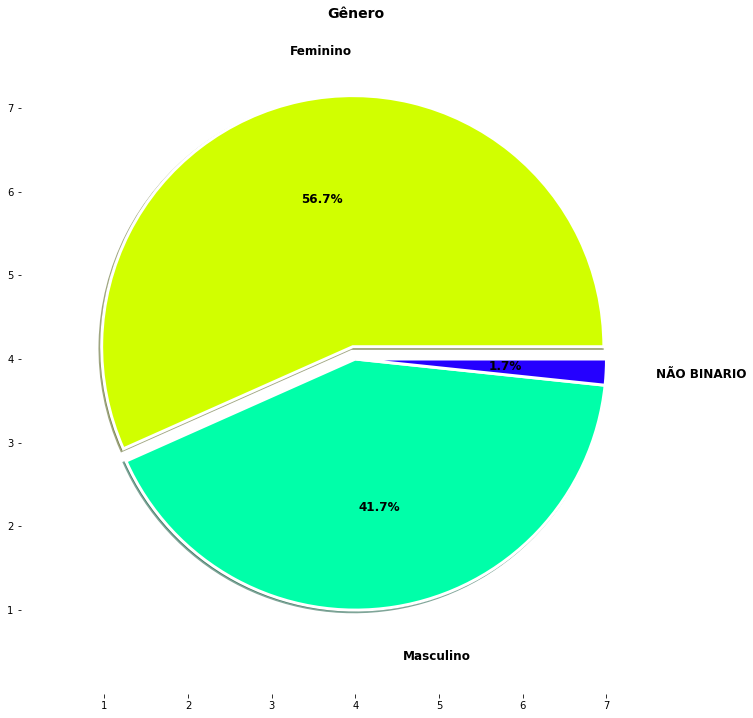

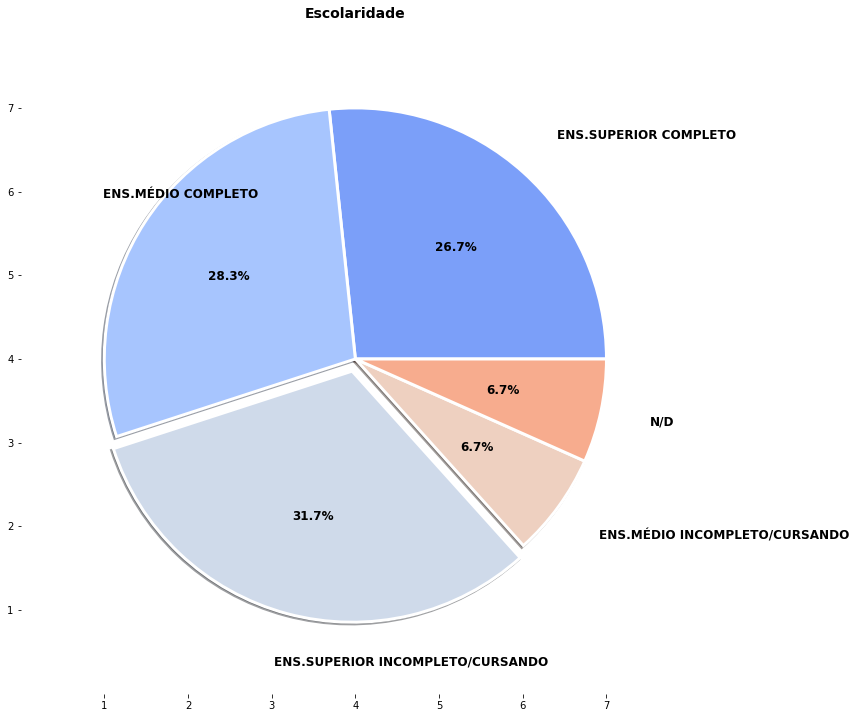

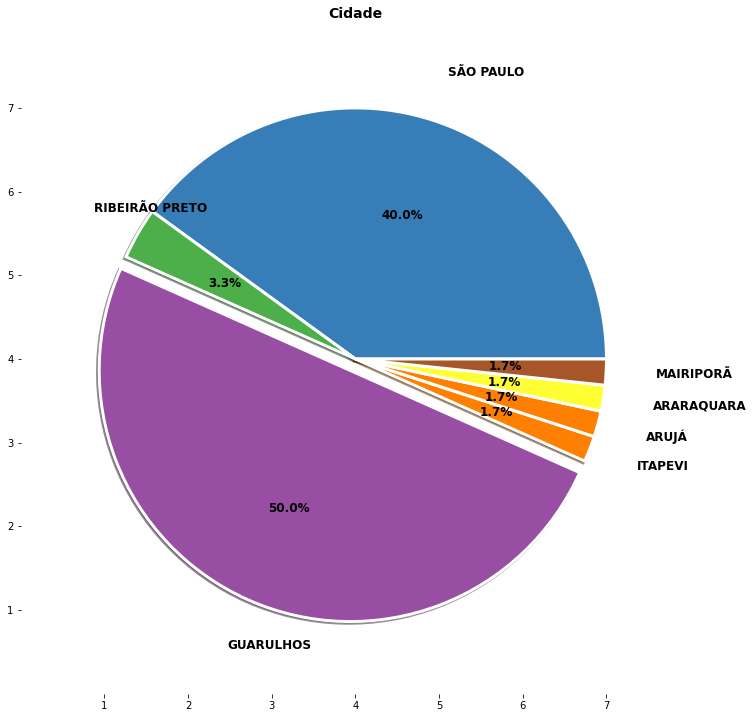

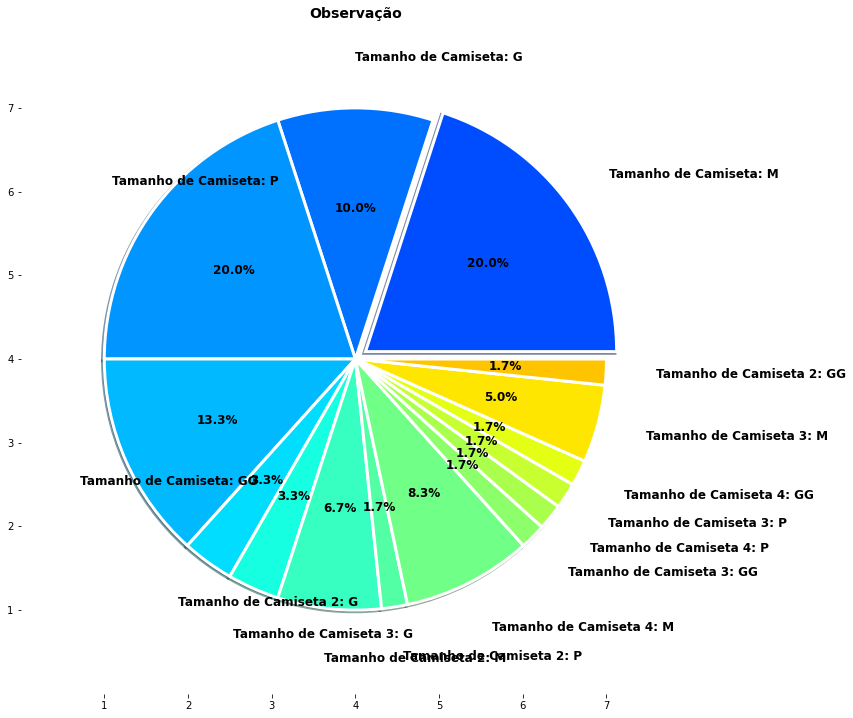

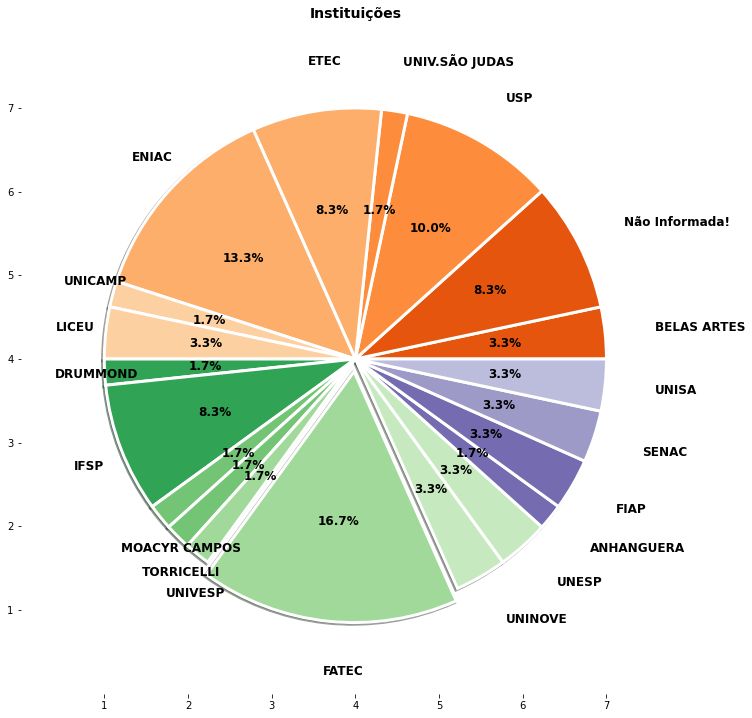

In [18]:
#
pieGraph(dataPieGraph(ins['genero'])
        ,titulo='Gênero'
        ,nomeArquivo='./Imagens/Genero.jpg'
        ,colorMap='hsv'
        )

pieGraph(dataPieGraph(ins['escolaridade2'])
        ,titulo='Escolaridade'
        ,nomeArquivo='./Imagens/Escolaridade.jpg'
        ,colorMap='coolwarm'
        )

pieGraph(dataPieGraph(ins['cidade'])
        ,titulo='Cidade'
        ,nomeArquivo='./Imagens/Cidade.jpg'
        ,colorMap='Set1'
        )

pieGraph(dataPieGraph(ins['observacao'])
        ,titulo='Observação'
        ,nomeArquivo='./Imagens/Observacao.jpg'
        ,colorMap='jet'
        )

pieGraph(dataPieGraph(ins['instituicaoAjustada'])
        ,titulo='Instituições'
        ,nomeArquivo='./Imagens/Instituicao.jpg'
        ,colorMap='tab20c'
        )

### Gráfico de pizza com agrupamento de dado e seleção.

In [19]:
insInst=pd.DataFrame(ins.groupby('instituicaoAjustada')['nome'].count())
insInst.reset_index(inplace=True)
insInst=insInst[(insInst['nome']>=3)]
insInst

,instituicaoAjustada,nome
3,ENIAC,8
4,ETEC,5
5,FATEC,10
7,IFSP,5
10,Não Informada!,5
19,USP,6


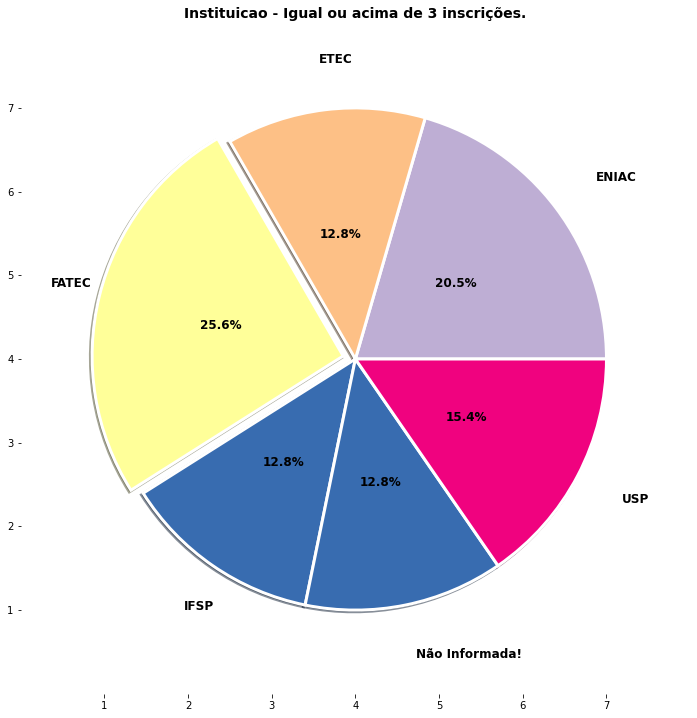

In [20]:
def pieGraphCompute(data, etiquetas, **kwargs):
    
    colormap='viridis'
    nomeArquivo='./Imagens/'+'Instituicao_AcimaDe'+'.jpg'
    
    for chave in kwargs:
        if (chave=='titulo'):
            titulo=kwargs[chave]
        if (chave=='colormap'):
            colormap=kwargs[chave]
        if (chave=='arquivo'):
            nomeArquivo='./imagens/'+kwargs['arquivo']
            
    
    colors = plt.get_cmap(colormap)(np.linspace(0.2, 0.7, len(etiquetas)))
    
    fig, ax = plt.subplots(figsize=(12,16))
    plt.title(titulo, fontdict={'size':14, 'weight':'bold'})

    explode=explodePie(data)

    ax.pie(x=data
            ,labels=etiquetas
            ,colors=colors
            ,autopct='%1.1f%%'
            ,pctdistance=.5
            ,labeldistance=1.2
            ,radius=3
            ,wedgeprops={"linewidth": 3, "edgecolor": "white"}
            ,textprops={'size':12, 'weight':'bold'}
            ,center=(4,4)
            ,frame=False
            ,explode=explode
            ,shadow=True
           )
    ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
           ylim=(0, 8), yticks=np.arange(1, 8))
    plt.savefig(nomeArquivo, dpi=300) #, orietation='landscape')
    plt.show()

pieGraphCompute(data=insInst['nome'], 
                etiquetas=insInst['instituicaoAjustada'],
                titulo='Instituicao - Igual ou acima de 3 inscrições.', 
                colormap='Accent',
                arquivo='Instituicao_AcimaDe.jpg'
               )

### Gráfico de pizza calculando faixa de valores.

Faixa de dados:
 [['De 15 à 19.', 'De 20 à 29.', 'De 30 à 39.', 'De 40 à 49.', '50+'], [23, 30, 6, 0, 1]]: 


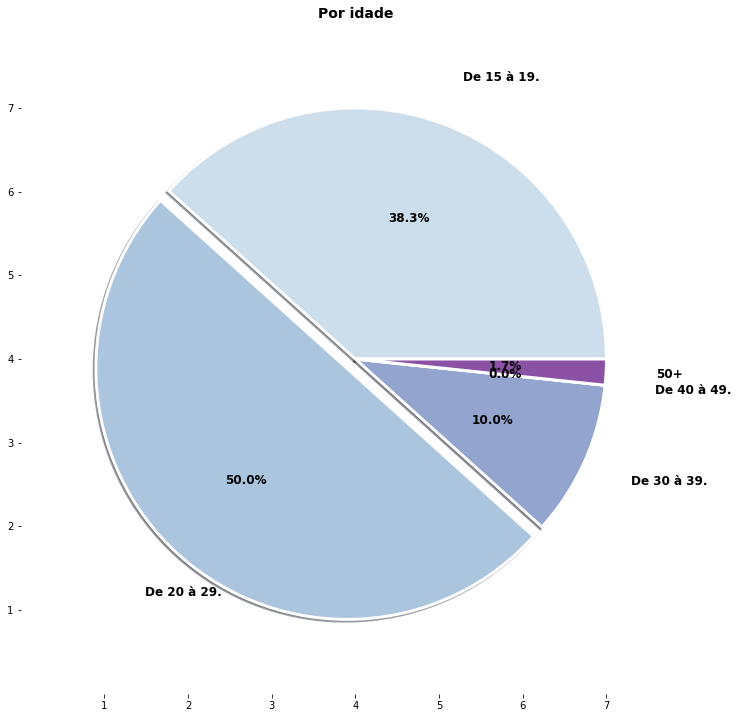

In [21]:
dataPie=dataComputeByRange([ #{'abaixo':0},{'min':1,'max':14},
                           {'min':15,'max':19},{'min':20,'max':29},{'min':30,'max':39},
                           {'min':40,'max':49},{'acima':50}],
                        ins['idade'] 
                   )
print('Faixa de dados:\n {dataPie}: '.format(dataPie=dataPie))

pieGraph(dataPie
        ,titulo='Por idade'
        ,nomeArquivo='./Imagens/PorIdade.jpg'
        ,colorMap='BuPu')

### Scatter Plot .

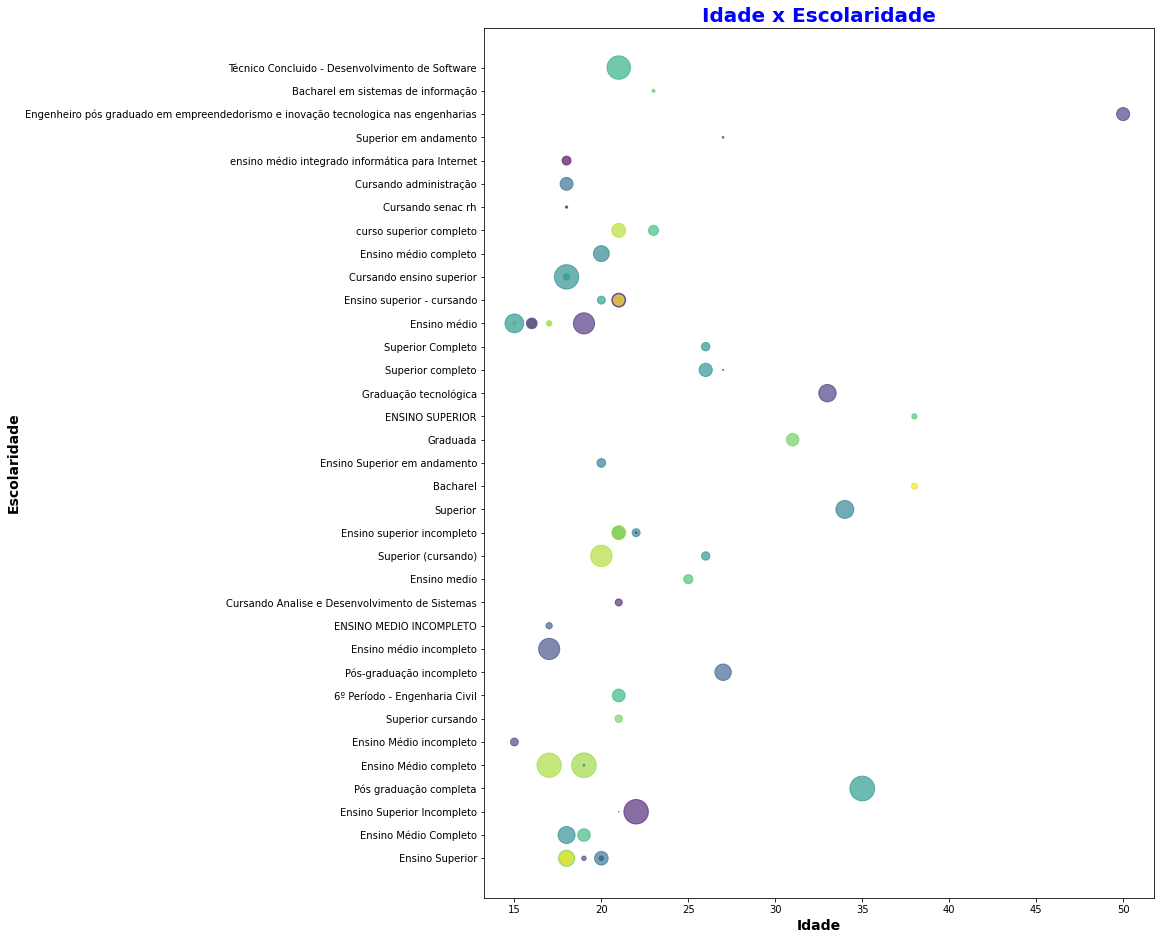

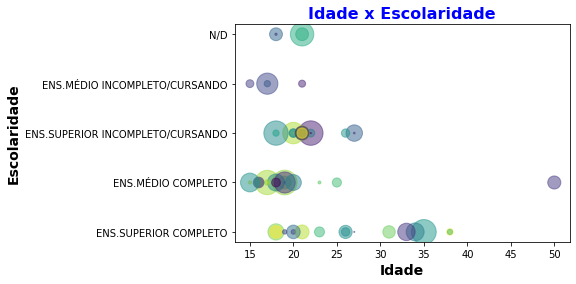

In [22]:
def scatterPlot():
    idade=ins['idade']
    escolar1=ins['escolaridade']
    escolar2=ins['escolaridade2']

    N=len(idade)
    colors = np.random.rand(N)
    area = (25 * np.random.rand(N))**2
    
    plt.figure(figsize=(12,16))
    plt.title('Idade x Escolaridade', c='blue', fontsize=20, fontweight='bold')
    plt.scatter(idade, escolar1, s=area, c=colors, alpha=.65)
    plt.xlabel('Idade', {'fontsize':14, 'fontweight':'bold'})
    plt.ylabel('Escolaridade', {'fontsize':14, 'fontweight':'bold'})
    plt.savefig('./imagens/Scatter01.jpg', dpi=300, orientation='landscape')
    plt.show()

    plt.title('Idade x Escolaridade', c='blue', fontsize=16, fontweight='bold')
    plt.scatter(idade, escolar2, s=area, c=colors, alpha=.5)
    plt.xlabel('Idade', {'fontsize':14, 'fontweight':'bold'})
    plt.ylabel('Escolaridade', {'fontsize':14, 'fontweight':'bold'})
    plt.savefig('./imagens/Scatter02.jpg', dpi=300, orientation='landscape')
    plt.show()

scatterPlot()

### Gráfico de linha (plot).

In [23]:
def graficoGenerico(dataFrame, **kwargs):
    #np.random.seed(8192)
    ## Kwargs
    titulo= "Título" if (kwargs.get('titulo') is None) else kwargs.get('titulo')
    xlabel= "Eixo X" if (kwargs.get('xlabel') is None) else kwargs.get('xlabel')
    ylabel= "Eixo Y" if (kwargs.get('ylabel') is None) else kwargs.get('ylabel')
    rotacao= 0 if (kwargs.get('rotacao') is None) else kwargs.get('rotacao')
    arquivo= './imagens/Grafico'+str(np.random.randint(1,100)).zfill(3)+'.jpg' if (kwargs.get('arquivo') is None) else kwargs.get('arquivo')
    
    plt.figure(figsize=(12,16))
    plt.title(titulo, {'fontsize':20,'fontweight':'bold', 'color':'Blue'})
    
    plt.xlabel(xlabel, {'fontsize':18,'fontweight':'bold', 'color':'Black'})
    plt.ylabel(ylabel, {'fontsize':18,'fontweight':'bold', 'color':'Black'})
    plt.xticks(rotation=rotacao)
    
    plt.plot(dataFrame, linewidth=2.5, color='Green', marker='s', 
                 mec='blue', markersize=12 )
    plt.savefig(arquivo, dpi=300, orientation='landscape')
    plt.show()

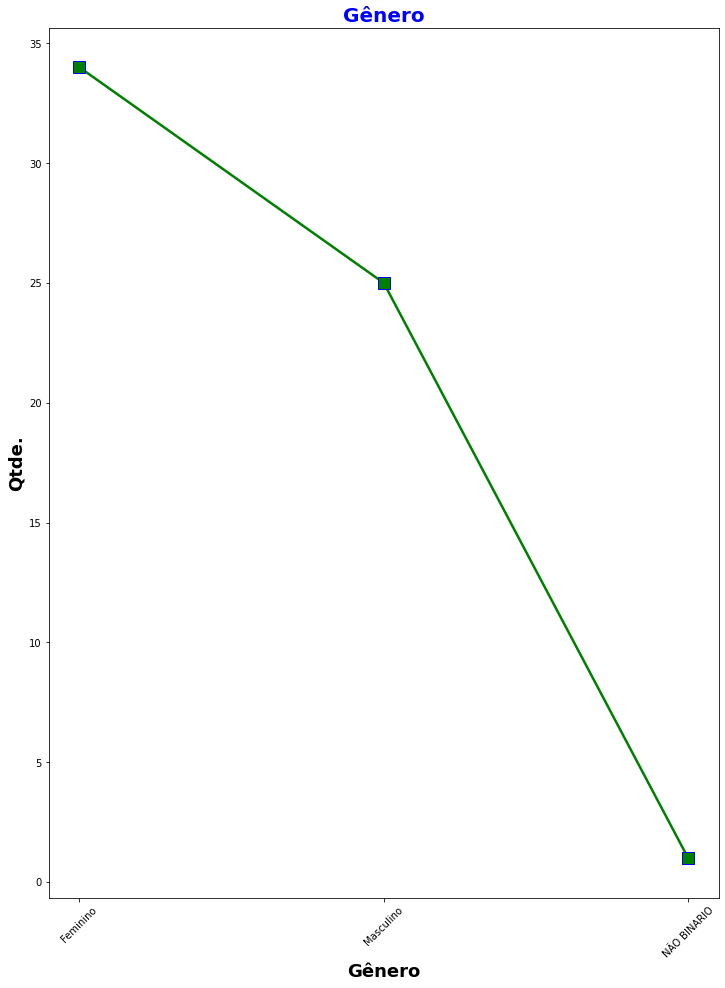

In [24]:
ins1=ins.groupby('genero')['genero'].count()
    
graficoGenerico(ins1, titulo='Gênero', xlabel='Gênero', ylabel='Qtde.', 
                rotacao=45, arquivo='./imagens/Grafico_001.jpg')

### Gerar um atquivo html com os principais dados.

In [25]:
# https://stackoverflow.com/questions/50807744/apply-css-class-to-pandas-dataframe-using-to-html
def geraHTML(dataFrame, arquivoHTML = 'index_inscrições.html', 
             cssStyle = 'style.css', titulo = 'Html'):
    html_string = '''
        <!DOCTYPE html>
        <html lang='pt-br'>
          <head>
              <title>{titulo}</title>
          </head>
          <link rel="stylesheet" type="text/css" href="{css}"/>
          <body>
                {tabela}
          </body>
        </html>
    '''
    with open(arquivoHTML, 'w') as arquivo:
        arquivo.write(html_string.format(titulo=titulo,
                               tabela=dataFrame.to_html(
                                       index=False,
                                       justify='center',
                                       classes='mystyle'),
                               css=cssStyle
                              ))
    
insHtml=ins[['nroInscricao','nome','cpf','cpfValidado',
             'dataNascimento','dataNascAjustada','idade','genero','generoId',
             'escolaridade','escolaridade2','instituicao','instituicaoAjustada',
             'telefoneAjustado','email','emailValidado',
             'cidade','cepAjustado','observacao','selecionado']]       
insHtml.columns=[['Nro.Inscricao','Nome','CPF','CPF Validado',
                  'Data Nascimento','Data Nasc.','Idade','Gênero','Id.Gênero',
                  'Escolaridade','Escolar.Ajustado','Instituição','Inst.Ajustada',
                  'Telefone/Cel','e-Mail','e-Mail Validado',
                  'Cidade','CEP','Observação','Selecionado']]  
        
geraHTML(insHtml, 
         './html/Hackathon 2024 - Inscrições.html','../css/df_style.css',
         'Hackathon 2024 - Inscrições')

#### Nested Pie (Gráfico de Pizza interna).
#### https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html

In [26]:
insGrafico=ins[(ins['selecionado2']=='SIM')][['nome','idade','genero','instituicaoAjustada','observacao','incluiOutro','perfil','selecionado']]
insGrafico=ins[['nome','idade','genero','instituicaoAjustada','observacao','incluiOutro','perfil','selecionado','selecionado2']]
insGrafico.head()

,nome,idade,genero,instituicaoAjustada,observacao,incluiOutro,perfil,selecionado,selecionado2
0,Isabelle Victoria Pereira De Souza,20,Feminino,BELAS ARTES,Tamanho de Camiseta: M,N,Desenvolvedor,SIM,SIM
6,Cristofer Batista da Silva,19,Masculino,Não Informada!,Tamanho de Camiseta: G,N,Empreendedor e Designer de UX,SIM,SIM
7,Thiago Henrique Silva,21,Masculino,USP,Tamanho de Camiseta: M,N,Analista de Negócios,SIM,SIM
8,Anaíle Silva de Oliveira,22,Feminino,UNIV.SÃO JUDAS,Tamanho de Camiseta: M,N,Meu Primeiro Hackathon,SIM,SIM
10,Maria Santiellas Costa Rodrigues,35,Feminino,USP,Tamanho de Camiseta: P,N,Analista de Negócios,SIM,SIM


In [27]:
## Fase 1 - Filtrar os dados.
colecao=insGrafico[(insGrafico['incluiOutro']!='N')][['incluiOutro','idade']]
colecao.columns=['grupo','idade']
# Teste
#colecao=colecao[(colecao['grupo']=='GRUPO 01')|(colecao['grupo']=='GRUPO 02')|(colecao['grupo']=='GRUPO 03')]

In [28]:
## Fase 2 - Quantificar o número de components por grupo e pela idade, obtendo a quantidade máxima.
## Para composição do Array do Gráfico de Pizza intermo.
maxComp=colecao.groupby('grupo').count()
maxComp=maxComp['idade'].max()
print('Máximo de componentes por grupo e idade: {max}'.format(max=maxComp))

Máximo de componentes por grupo e idade: 4


In [29]:
## Fase 3 - Montagem dos arrays de dados e das etiquetas.

# Monta as etiquetas de grupo!
grupo=[]
for grp in colecao['grupo'].values:
    adiciona=True
    for grpUnico in grupo:
        if (grpUnico==grp):
            adiciona=False
            break
    if (adiciona):
        grupo.append(grp)

# Monta o array com os dados.
# Lembrando que cada array interno deverá ter a mesma quantidade de elementos:
# [ [n1, n2, n3], [n1, n2, n3], [n1, n2, n3], ... ] 
dadosGrupo=[]; etiquetaInterna=[]
for grp in grupo:
    subArrayGrupo=[]
    dadoGrp=colecao[(colecao['grupo']==grp)][['grupo','idade']]
    for i in dadoGrp.values:
        subArrayGrupo.append(float(i[1]))

        # Adiciona as etiquetas do array interno.
        etiquetaInterna.append(str(i[1]))

    if (len(subArrayGrupo)<maxComp):
        completar=(maxComp-len(subArrayGrupo))
        for i in range(0,completar):
            subArrayGrupo.append(float(0))

            ## Adiciona estiquetas vazias para a coerencia com os dados do array interno
            etiquetaInterna.append('')

    dadosGrupo.append(subArrayGrupo)

def saida():
    print('Etiqueta dos grupos (array:grupo):\n', grupo)
    print('Quantidade de grupos:', len(grupo), '\n')
    print('Etiqueta dos dados internos (array:labelInnerPie):\n', etiquetaInterna)
    print('Quantidade de etiquetas internas:', len(etiquetaInterna), '\n')
    print('Dados do grupo (array:dataGrupo):\n', dadosGrupo)
    print('Quantidade por grupo:', len(dadosGrupo)*maxComp)

#saida()

### Monta o Nested Pie.

In [30]:
def innerPie(dados, labelOuterPie, labelInnerPie, **kwargs):

    titulo='Título'; arquivoImagem='InnerPie_'+str(np.random.randint(1,999)).zfill(3)
    for kgs in kwargs:
        if (kgs=='titulo'):
            titulo=kwargs[kgs]
        if (kgs=='arquivoimagem'):
            arquivoImagem=kwargs[kgs]
  
    fig, ax = plt.subplots(figsize=(12,16))
    
    size = 0.3
    #vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

    # Dados, valores...
    vals = np.array(dados)
    
    cmap = plt.colormaps["Set2"]
    outer_colors = cmap(np.arange(4)*2)
    inner_colors = cmap([1, 2, 5, 6, 9, 10])
    
    ax.pie(vals.sum(axis=1), 
           labels=labelOuterPie,
           radius=1, 
           colors=outer_colors,
           wedgeprops=dict(width=size, edgecolor='w'),
           frame=True,
           labeldistance=1.08
           )
    
    ax.pie(vals.flatten(), 
           labels=labelInnerPie,
           radius=1-size, 
           colors=inner_colors, 
           wedgeprops=dict(width=size, edgecolor='w'),
           frame=False,
           labeldistance=.75
           )
    
    ax.set(aspect="equal", title=titulo)
    plt.savefig('./Imagens/'+arquivoImagem, dpi=300, orientation='landscape')
    plt.show()

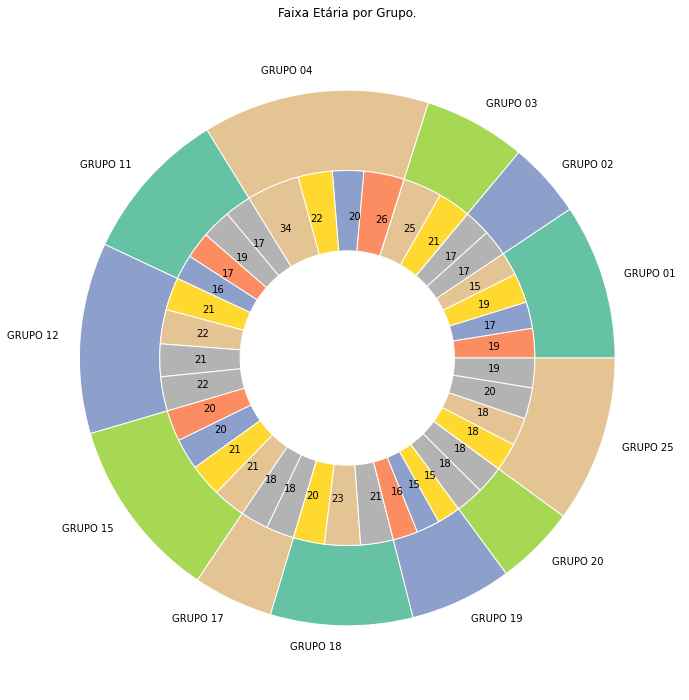

In [31]:
innerPie(dadosGrupo, grupo, etiquetaInterna, titulo='Faixa Etária por Grupo.', arquivoimagem='InnerPie_001.jpg')

#### End